<a href="https://colab.research.google.com/github/Shashank-u803/BIS-Lab/blob/main/Week%203/Particle_Swarm_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Particle Swarm Optimization...
Initial Global Best Fitness: 2.796646
--------------------------------------------------
Iteration 20: Best Fitness = 0.000006
Iteration 40: Best Fitness = 0.000000
Iteration 60: Best Fitness = 0.000000
Iteration 80: Best Fitness = 0.000000
Iteration 100: Best Fitness = 0.000000
--------------------------------------------------

Optimization Complete!
Best Solution Found: [ 8.36995227e-13 -9.76276964e-14]
Best Fitness Value: 0.000000
Optimal Solution (Expected): [0, 0] with fitness 0


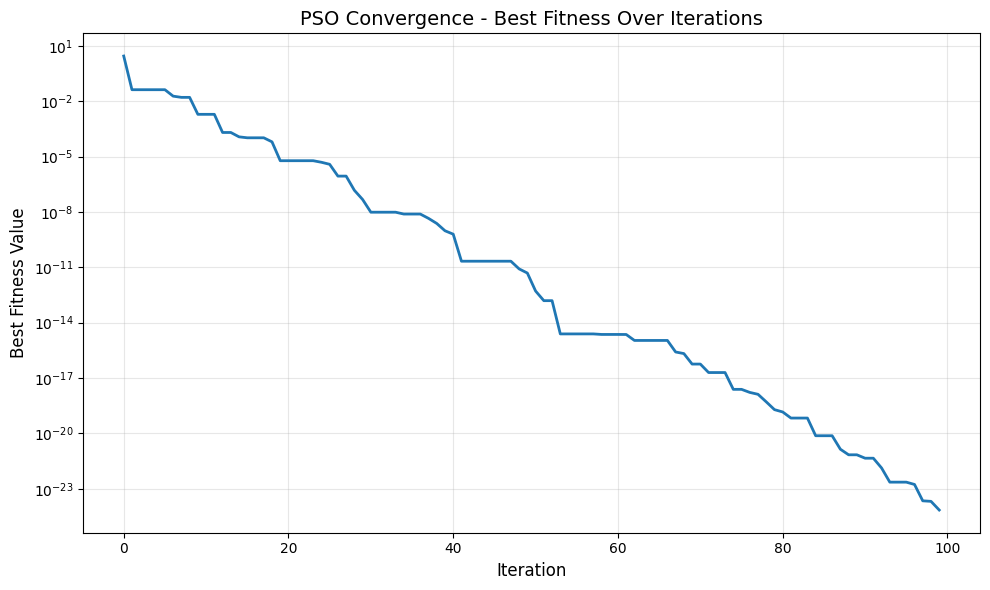

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the optimization function
# We'll use the Sphere function: f(x) = x1^2 + x2^2
# Goal: Minimize this function (optimal solution is at x1=0, x2=0, f(x)=0)
def objective_function(position):
    """
    Sphere function - a simple convex function for optimization
    position: array of [x1, x2, ..., xn]
    Returns: fitness value (lower is better)
    """
    return np.sum(position ** 2)

# Step 2: Initialize PSO Parameters
n_particles = 30          # Number of particles in the swarm
n_dimensions = 2          # Number of dimensions (variables to optimize)
n_iterations = 100        # Number of iterations

# PSO hyperparameters
w = 0.5                   # Inertia weight (controls previous velocity influence)
c1 = 1.5                  # Cognitive coefficient (personal best influence)
c2 = 1.5                  # Social coefficient (global best influence)

# Search space bounds
lower_bound = -10         # Minimum value for each dimension
upper_bound = 10          # Maximum value for each dimension

# Step 3: Initialize Particles
# Random positions within bounds
positions = np.random.uniform(lower_bound, upper_bound, (n_particles, n_dimensions))

# Random velocities (start with small velocities)
velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

# Personal best positions (initially same as current positions)
personal_best_positions = positions.copy()

# Personal best fitness values
personal_best_fitness = np.array([objective_function(p) for p in positions])

# Global best position and fitness
global_best_index = np.argmin(personal_best_fitness)
global_best_position = personal_best_positions[global_best_index].copy()
global_best_fitness = personal_best_fitness[global_best_index]

# Track best fitness over iterations for visualization
fitness_history = []

# Step 6: Iterate through generations
print("Starting Particle Swarm Optimization...")
print(f"Initial Global Best Fitness: {global_best_fitness:.6f}")
print("-" * 50)

for iteration in range(n_iterations):
    # Step 4: Evaluate Fitness for each particle
    for i in range(n_particles):
        fitness = objective_function(positions[i])

        # Update personal best if current position is better
        if fitness < personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = positions[i].copy()

        # Update global best if this particle is better than global best
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = positions[i].copy()

    # Step 5: Update Velocities and Positions
    for i in range(n_particles):
        # Random factors for cognitive and social components
        r1 = np.random.random(n_dimensions)
        r2 = np.random.random(n_dimensions)

        # Velocity update formula:
        # v = w*v + c1*r1*(personal_best - current) + c2*r2*(global_best - current)
        cognitive_component = c1 * r1 * (personal_best_positions[i] - positions[i])
        social_component = c2 * r2 * (global_best_position - positions[i])
        velocities[i] = w * velocities[i] + cognitive_component + social_component

        # Update position: new_position = current_position + velocity
        positions[i] = positions[i] + velocities[i]

        # Keep particles within bounds
        positions[i] = np.clip(positions[i], lower_bound, upper_bound)

    # Record best fitness for this iteration
    fitness_history.append(global_best_fitness)

    # Print progress every 20 iterations
    if (iteration + 1) % 20 == 0:
        print(f"Iteration {iteration + 1}: Best Fitness = {global_best_fitness:.6f}")

# Step 7: Output the Best Solution
print("-" * 50)
print("\nOptimization Complete!")
print(f"Best Solution Found: {global_best_position}")
print(f"Best Fitness Value: {global_best_fitness:.6f}")
print(f"Optimal Solution (Expected): [0, 0] with fitness 0")

# Visualize convergence
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Best Fitness Value', fontsize=12)
plt.title('PSO Convergence - Best Fitness Over Iterations', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to better see convergence
plt.tight_layout()
plt.show()